## Class variables

In [1]:
class ShippingContainer:
    
    serial = 0 # A class variable
    
    def __init__(self, owner, contents):
        self.owner = owner # Instance variable
        self.contents = contents
        self.serial = ShippingContainer.serial
        ShippingContainer.serial += 1 # Increment class variable

In [2]:
nasa = ShippingContainer('NASA', 'blue things')

In [3]:
isro = ShippingContainer('ISRO', 'yellow things')

In [4]:
nasa.serial

0

In [5]:
isro.serial

1

## Static Methods

In [6]:
class ShippingContainer:
    
    serial = 0 # A class variable
    
    # Static methods are equivalent to functions defined outside the class
    @staticmethod # No need to add `self` argument to _get_serial
    def _get_serial():
        result = ShippingContainer.serial
        ShippingContainer.serial += 1
        return result
    
    def __init__(self, owner, contents):
        self.owner = owner # Instance variable
        self.contents = contents # Yet another instance variable
        self.serial = ShippingContainer._get_serial()

In [7]:
google = ShippingContainer('GOOGLE', 'turqouisy things')

In [8]:
microsoft = ShippingContainer('MICROSOFT', 'blackish things')

In [9]:
google.serial

0

In [10]:
microsoft.serial

1

## Class Methods

In [11]:
class ShippingContainer:
    
    serial = 0 # A class variable
    
    # Class methods are used when class objects are required
    @classmethod # Add class as argument
    def _get_serial(Sc):
        result = Sc.serial
        Sc.serial += 1
        return result
    
    def __init__(self, owner, contents):
        self.owner = owner # Instance variable
        self.contents = contents
        self.serial = ShippingContainer._get_serial()

In [12]:
adafruit = ShippingContainer('ADAFRUIT', 'white thingys')

In [13]:
arduino = ShippingContainer('ARDUINO', 'silver thingies')

In [14]:
adafruit.contents

'white thingys'

In [15]:
adafruit.serial

0

In [16]:
arduino.serial

1

## Factory Functions wih class methods

In [17]:
class ShippingContainer:
    
    serial = 0 # A class variable
    
    @classmethod # Add class as argument
    def _get_serial(Sc):
        result = Sc.serial
        Sc.serial += 1
        return result
    
    @classmethod
    def create_empty(cls, owner):
        return cls(owner, contents = None)
        
    @classmethod
    def create_with_items(cls, owner, contents):
        return cls(owner, contents)
    
    def __init__(self, owner, contents):
        self.owner = owner # Instance variable
        self.contents = contents
        self.serial = ShippingContainer._get_serial()

In [18]:
sammy = ShippingContainer('SAMSUNG', 'transparent things')

In [19]:
apple = ShippingContainer('APPLE', 'glossy things')

In [20]:
nokia = ShippingContainer.create_empty('NOKIA')

In [21]:
nokia.serial

2

## A more elaborate example

In [22]:
import iso6346 # To create BIC code, given the serial

In [23]:
class ShippingContainer:
    
    serial = 0 # A class variable
    
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6))
    
    
    @classmethod # Add class as argument
    def _get_serial(Sc):
        result = Sc.serial
        Sc.serial += 1
        return result
    
    
    @classmethod
    def create_empty(cls, owner):
        return cls(owner, contents = None)
    
        
    @classmethod
    def create_with_items(cls, owner, contents):
        return cls(owner, contents)
    
    
    def __init__(self, owner, contents):
        self.contents = contents
        self.bic_code = ShippingContainer._make_bic_code(owner=owner, serial=ShippingContainer._get_serial())

In [24]:
amazon = ShippingContainer('AMZ', ['black things', 'blue things', 'orange things'])

In [25]:
amazon.bic_code

'AMZU0000004'

## Choosing static v/s class methods

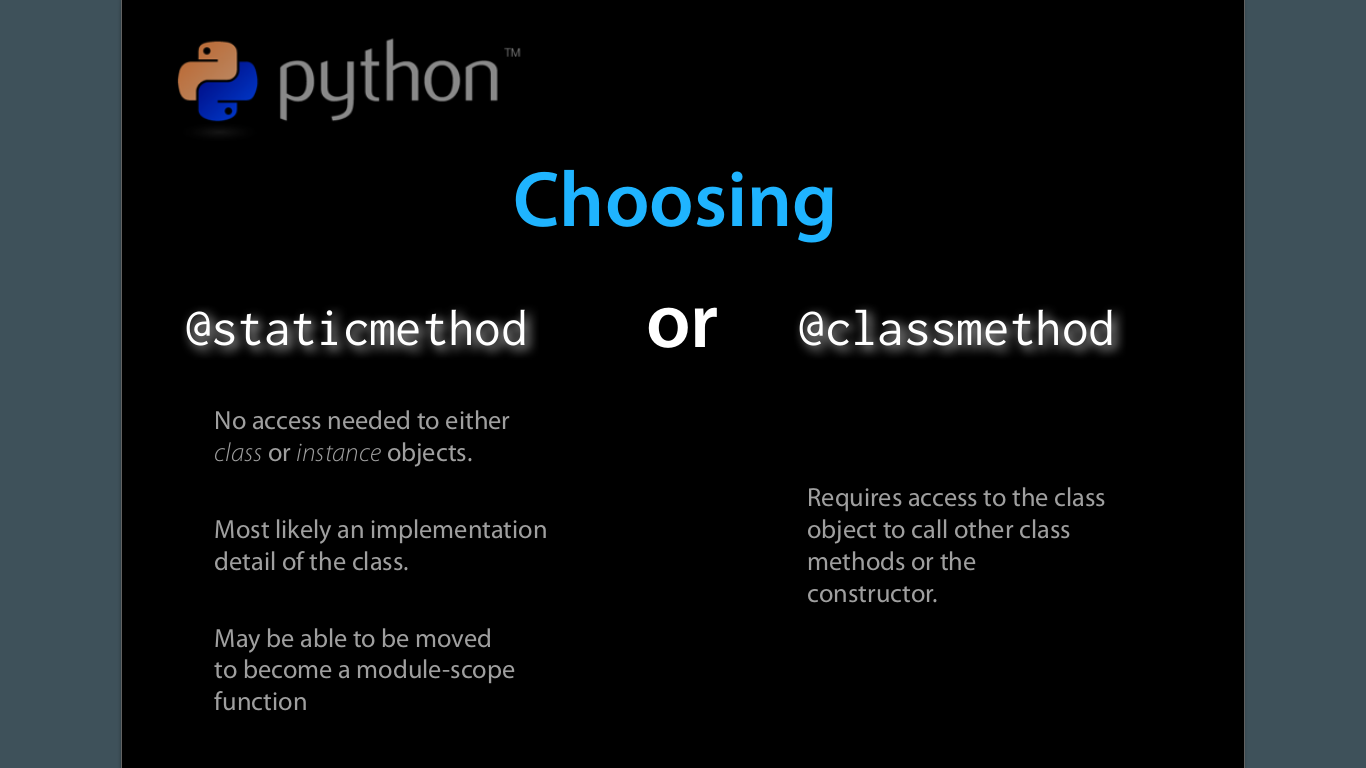

In [26]:
from IPython.display import Image
Image('static_vs_class.png')

## Static methods in inheritance

In [27]:
class ShippingContainer:
    
    serial = 0 # A class variable
    
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6))
    
    @classmethod # Add class as argument
    def _get_serial(Sc):
        result = Sc.serial
        Sc.serial += 1
        return result
    
    @classmethod
    def create_empty(cls, owner):
        return cls(owner, contents = None)
         
    @classmethod
    def create_with_items(cls, owner, contents):
        return cls(owner, contents)
    
    def __init__(self, owner, contents):
        self.contents = contents
        # Static methods can change instance and not the class object and hence,
        # the self._make_bic_code instead of ShippingContainer._make_bic_code
        self.bic_code = self._make_bic_code(owner=owner, serial=ShippingContainer._get_serial())
       
       
class RefrigeratedShippingContainer(ShippingContainer):
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6), category='R')

In [28]:
kinley = RefrigeratedShippingContainer('KIN', ['yellow', 'purple', 'green'])

In [29]:
kinley.bic_code

'KINR0000006'

## Class methods and inheritance

In [30]:
class ShippingContainer:
    
    serial = 0 # A class variable
    
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6))
    
    @classmethod # Add class as argument
    def _get_serial(Sc):
        result = Sc.serial
        Sc.serial += 1
        return result
    
    @classmethod
    # To accomodate extra args of child class
    def create_empty(cls, owner, *args, **kwargs):
        return cls(owner, contents = None, *args, **kwargs)
         
    @classmethod
    # To accomodate extra args of child class
    def create_with_items(cls, owner, contents, *args, **kwargs):
        return cls(owner, contents, *args, **kwargs)
    
    def __init__(self, owner, contents):
        self.contents = contents
        # Static methods can change instance and not the class object and hence,
        # the self._make_bic_code instead of ShippingContainer._make_bic_code
        self.bic_code = self._make_bic_code(owner=owner, serial=ShippingContainer._get_serial())
       
       
class RefrigeratedShippingContainer(ShippingContainer):
    
    MAX_TEMP = 4.0
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6), category='R')
    
    def __init__(self, owner, contents, celsius):
        # To get init method of parent
        super().__init__(owner, contents)
        if celsius > RefrigeratedShippingContainer.MAX_TEMP:
            raise ValueError('Temperature can\'t be greater than 4°C')
        self.celsius = celsius

In [31]:
bisleri = RefrigeratedShippingContainer.create_empty('BIS', celsius=4)

In [32]:
bisleri.serial

1

In [33]:
bisleri.bic_code

'BISR0000006'

In [34]:
# However celsius attribute is not bounded
bisleri.celsius = 34.0

In [35]:
bisleri.celsius

34.0

## Using the property decorator
The pythonic way to do getters and setters

In [36]:
class ShippingContainer:
    
    serial = 0 # A class variable
    
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6))
    
    @classmethod # Add class as argument
    def _get_serial(Sc):
        result = Sc.serial
        Sc.serial += 1
        return result
    
    @classmethod
    # To accomodate extra args of child class
    def create_empty(cls, owner, *args, **kwargs):
        return cls(owner, contents = None, *args, **kwargs)
         
    @classmethod
    # To accomodate extra args of child class
    def create_with_items(cls, owner, contents, *args, **kwargs):
        return cls(owner, contents, *args, **kwargs)
    
    def __init__(self, owner, contents):
        self.contents = contents
        # Static methods can change instance and not the class object and hence,
        # the self._make_bic_code instead of ShippingContainer._make_bic_code
        self.bic_code = self._make_bic_code(owner=owner, serial=ShippingContainer._get_serial())
       
       
class RefrigeratedShippingContainer(ShippingContainer):
    
    MAX_TEMP = 4.0
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6), category='R')
    
    def __init__(self, owner, contents, celsius):
        # To get init method of parent
        super().__init__(owner, contents)
        if celsius > RefrigeratedShippingContainer.MAX_TEMP:
            raise ValueError('Temperature can\'t be greater than 4°C')
            
        # _celsius a convention for naming (not so) private variables
        self._celsius = celsius
    
    @property
    def celsius(self):
        return self._celsius
    
    @celsius.setter
    def celsius(self, value):
        if value > RefrigeratedShippingContainer.MAX_TEMP:
            raise ValueError('Temperature can\'t be greater than 4°C')
        self._celsius = value

In [37]:
try:
    funfoods = RefrigeratedShippingContainer('FFD', ['creamy', 'burgundish', 'pale'], 18.0)
except Exception as e:
    print(e)
    funfoods = RefrigeratedShippingContainer('FFD', ['creamy', 'burgundish', 'pale'], -18.0)

Temperature can't be greater than 4°C


In [38]:
try:
    funfoods.celsius = 32.0
except ValueError as e:
    print(e)

Temperature can't be greater than 4°C


### Adding temperature conversions


In [39]:
class ShippingContainer:
    
    serial = 0 # A class variable
    
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6))
    
    @classmethod # Add class as argument
    def _get_serial(Sc):
        result = Sc.serial
        Sc.serial += 1
        return result
    
    @classmethod
    # To accomodate extra args of child class
    def create_empty(cls, owner, *args, **kwargs):
        return cls(owner, contents = None, *args, **kwargs)
         
    @classmethod
    # To accomodate extra args of child class
    def create_with_items(cls, owner, contents, *args, **kwargs):
        return cls(owner, contents, *args, **kwargs)
    
    def __init__(self, owner, contents):
        self.contents = contents
        # Static methods can change instance and not the class object and hence,
        # the self._make_bic_code instead of ShippingContainer._make_bic_code
        self.bic_code = self._make_bic_code(owner=owner, serial=ShippingContainer._get_serial())
       
       
class RefrigeratedShippingContainer(ShippingContainer):
    
    MAX_TEMP = 4.0
    
    @staticmethod
    def _f_to_c(fahrenheit):
        return (fahrenheit - 32) * 5 / 9
    
    @staticmethod
    def _c_to_f(celsius):
        return (celsius) * 9 / 5 + 32
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6), category='R')
    
    def __init__(self, owner, contents, celsius):
        # To get init method of parent
        super().__init__(owner, contents)
        # Equivalent to self._celsius = celsius with celsius.setter checks
        self.celsius = celsius
    
    @property
    def celsius(self):
        return self._celsius
    
    @celsius.setter
    def celsius(self, value):
        if value > RefrigeratedShippingContainer.MAX_TEMP:
            raise ValueError('Temperature can\'t be greater than 4°C')
        self._celsius = value
    
    @property
    def fahrenheit(self):
        return RefrigeratedShippingContainer._c_to_f(self.celsius)
    
    @fahrenheit.setter
    def fahrenheit(self, value):
        self.celsius = RefrigeratedShippingContainer._f_to_c(value)

In [40]:
heineken = RefrigeratedShippingContainer.create_empty('HEN', celsius=4.0)

In [41]:
heineken.bic_code

'HENR0000006'

In [42]:
heineken.fahrenheit = 10

In [43]:
heineken.celsius

-12.222222222222221

In [44]:
try:
    heineken.fahrenheit = 200
except ValueError as e:
    print(e)

Temperature can't be greater than 4°C


In [45]:
heineken.celsius

-12.222222222222221

In [46]:
heineken._celsius

-12.222222222222221

In [47]:
try:
    cola = RefrigeratedShippingContainer.create_empty('HEN', celsius=32)
except ValueError as e:
    print(e)

Temperature can't be greater than 4°C


### Adding Volume

In [48]:
class ShippingContainer:
    
    serial = 0 # A class variable
    
    HEIGHT_FT = 100
    WIDTH_FT = 100
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6))
    
    @classmethod # Add class as argument
    def _get_serial(Sc):
        result = Sc.serial
        Sc.serial += 1
        return result
    
    @classmethod
    # To accomodate extra args of child class
    def create_empty(cls, owner, *args, **kwargs):
        return cls(owner, contents = None, *args, **kwargs)
         
    @classmethod
    # To accomodate extra args of child class
    def create_with_items(cls, owner, contents, *args, **kwargs):
        return cls(owner, contents, *args, **kwargs)
    
    def __init__(self, owner, contents, length_ft):
        self.contents = contents
        self.length_ft = length_ft
        # Static methods can change instance and not the class object and hence,
        # the self._make_bic_code instead of ShippingContainer._make_bic_code
        self.bic_code = self._make_bic_code(owner=owner, serial=ShippingContainer._get_serial())
    
    @property
    def volume_ft3(self):
        return ShippingContainer.HEIGHT_FT * ShippingContainer.WIDTH_FT * self.length_ft


class RefrigeratedShippingContainer(ShippingContainer):
    
    MAX_TEMP = 4.0
    FRIDGE_VOLUME = 100
    
    @staticmethod
    def _f_to_c(fahrenheit):
        return (fahrenheit - 32) * 5 / 9
    
    @staticmethod
    def _c_to_f(celsius):
        return (celsius) * 9 / 5 + 32
    
    @staticmethod
    def _make_bic_code(owner, serial):
        return iso6346.create(owner_code=owner, serial=str(serial).zfill(6), category='R')
    
    def __init__(self, owner, contents, length_ft, celsius):
        # To get init method of parent
        super().__init__(owner, contents, length_ft)
        # Equivalent to self._celsius = celsius with celsius.setter checks
        self.celsius = celsius
    
    @property
    def celsius(self):
        return self._celsius
    
    @celsius.setter
    def celsius(self, value):
        if value > RefrigeratedShippingContainer.MAX_TEMP:
            raise ValueError('Temperature can\'t be greater than 4°C')
        self._celsius = value
    
    @property
    def fahrenheit(self):
        return RefrigeratedShippingContainer._c_to_f(self.celsius)
    
    @fahrenheit.setter
    def fahrenheit(self, value):
        self.celsius = RefrigeratedShippingContainer._f_to_c(value)
    
    @property
    def volume_ft3(self):
        # Using super()
        # No need to pass self argument
        return super().volume_ft3 - RefrigeratedShippingContainer.FRIDGE_VOLUME
#         return (self.length_ft
#                * RefrigeratedShippingContainer.WIDTH_FT
#                * RefrigeratedShippingContainer.HEIGHT_FT
#                - RefrigeratedShippingContainer.FRIDGE_VOLUME)

In [49]:
crayola = ShippingContainer.create_empty('CYA', length_ft=100)

In [50]:
crayola.volume_ft3

1000000

In [51]:
hersheys = RefrigeratedShippingContainer('HSS', contents=['black', 'blue', 'cream'], celsius=4, length_ft=200)

In [52]:
hersheys.volume_ft3

1999900

### Using bounded temperatures

In [62]:
class HeatedRefrigeratedShippingContainer(RefrigeratedShippingContainer):
    
    MIN_CELSIUS = -20.0
    
    @RefrigeratedShippingContainer.celsius.setter
    def celsius(self, value):
        if value < HeatedRefrigeratedShippingContainer.MIN_CELSIUS:
            raise ValueError('Temperature too cold < {}'.format(HeatedRefrigeratedShippingContainer.MIN_CELSIUS))
        # Here super() doesn't work
        RefrigeratedShippingContainer.celsius.fset(self, value)

In [63]:
ambuja = HeatedRefrigeratedShippingContainer('AUA', ['metal', 'coarsy'], 100, celsius=-12)

In [64]:
try:
    ambuja.celsius = -25.0
except ValueError as e:
    print(e)

Temperature too cold < -20.0


In [65]:
try:
    ambuja.celsius = 25.0
except ValueError as e:
    print(e)

Temperature can't be greater than 4°C
